In [334]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [335]:
import pandas as pd

In [336]:
odf = pd.read_csv("https://npg-ds.s3.amazonaws.com/bike_sharing.csv")
odf.copy()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [337]:
# save dataset into a different variable to avoid pulling/reading every time
df = odf.copy()

In [338]:
# describe dataset
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [339]:
# check for null values
df.copy().isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [340]:
# remove not necessary columns
df.drop(columns=["registered", "casual", "atemp"], axis=1, inplace=True)
df.copy()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,1
...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,129


In [341]:
DAYS = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
MONTHS = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# cast column to datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# extract data from datetime into individual features
df["hour_of_day"] = df["datetime"].dt.hour
df["day_of_week"] = df["datetime"].apply(lambda x: DAYS[x.dayofweek])
df["day_of_month"] = df["datetime"].dt.day
df["month"] = df["datetime"].apply(lambda x: MONTHS[x.month - 1])
df.drop(columns=["datetime"], axis=1, inplace=True)
df.copy()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour_of_day,day_of_week,day_of_month,month
0,1,0,0,1,9.84,81,0.0000,16,0,Saturday,1,January
1,1,0,0,1,9.02,80,0.0000,40,1,Saturday,1,January
2,1,0,0,1,9.02,80,0.0000,32,2,Saturday,1,January
3,1,0,0,1,9.84,75,0.0000,13,3,Saturday,1,January
4,1,0,0,1,9.84,75,0.0000,1,4,Saturday,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,336,19,Wednesday,19,December
10882,4,0,1,1,14.76,57,15.0013,241,20,Wednesday,19,December
10883,4,0,1,1,13.94,61,15.0013,168,21,Wednesday,19,December
10884,4,0,1,1,13.94,61,6.0032,129,22,Wednesday,19,December


In [342]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

# Should I be encoding boolean values?
# encode categorical values into reals using target encoder
df = TargetEncoder(cols=["season", "holiday", "workingday", "weather", "hour_of_day", "day_of_week", "month"]).fit_transform(df, df["count"])

# scale features
cols = df.columns.difference(['count'])
df[cols] = StandardScaler().fit_transform(df[cols])
df.copy()

/home/npg/.cache/pypoetry/virtualenvs/mlucu-FtCk9vg6-py3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour_of_day,day_of_week,day_of_month,month
0,-1.677258,0.17149,-1.460672,0.566156,-1.333661,0.993213,-1.567754,16,-1.047910,0.889151,-1.642070,-2.060190
1,-1.677258,0.17149,-1.460672,0.566156,-1.438907,0.941249,-1.567754,40,-1.211349,0.889151,-1.642070,-2.060190
2,-1.677258,0.17149,-1.460672,0.566156,-1.438907,0.941249,-1.567754,32,-1.295525,0.889151,-1.642070,-2.060190
3,-1.677258,0.17149,-1.460672,0.566156,-1.333661,0.681430,-1.567754,13,-1.381103,0.889151,-1.642070,-2.060190
4,-1.677258,0.17149,-1.460672,0.566156,-1.333661,0.681430,-1.567754,1,-1.422196,0.889151,-1.642070,-2.060190
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0.165297,0.17149,0.684616,0.566156,-0.596935,-0.617666,1.617227,336,0.950126,-0.552355,1.644787,-0.324885
10882,0.165297,0.17149,0.684616,0.566156,-0.702182,-0.253919,0.269704,241,0.283748,-0.552355,1.644787,-0.324885
10883,0.165297,0.17149,0.684616,0.566156,-0.807428,-0.046064,0.269704,168,-0.139814,-0.552355,1.644787,-0.324885
10884,0.165297,0.17149,0.684616,0.566156,-0.807428,-0.046064,-0.832442,129,-0.445456,-0.552355,1.644787,-0.324885


In [343]:
from sklearn.neighbors import LocalOutlierFactor

# search for outliers -1 for outliers
clf = LocalOutlierFactor(n_neighbors=60)
df["outlier"] = clf.fit_predict(df)
print(f"Number of outliers: {len(df[df.outlier == -1])}")
df = df[df.outlier == 1]
df.drop("outlier", axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)
df.copy()

Number of outliers: 231


,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour_of_day,day_of_week,day_of_month,month
0,-1.677258,0.17149,-1.460672,0.566156,-1.333661,0.993213,-1.567754,16,-1.047910,0.889151,-1.642070,-2.060190
1,-1.677258,0.17149,-1.460672,0.566156,-1.438907,0.941249,-1.567754,40,-1.211349,0.889151,-1.642070,-2.060190
2,-1.677258,0.17149,-1.460672,0.566156,-1.438907,0.941249,-1.567754,32,-1.295525,0.889151,-1.642070,-2.060190
3,-1.677258,0.17149,-1.460672,0.566156,-1.333661,0.681430,-1.567754,13,-1.381103,0.889151,-1.642070,-2.060190
4,-1.677258,0.17149,-1.460672,0.566156,-1.333661,0.681430,-1.567754,1,-1.422196,0.889151,-1.642070,-2.060190
...,...,...,...,...,...,...,...,...,...,...,...,...
10650,0.165297,0.17149,0.684616,0.566156,-0.596935,-0.617666,1.617227,336,0.950126,-0.552355,1.644787,-0.324885
10651,0.165297,0.17149,0.684616,0.566156,-0.702182,-0.253919,0.269704,241,0.283748,-0.552355,1.644787,-0.324885
10652,0.165297,0.17149,0.684616,0.566156,-0.807428,-0.046064,0.269704,168,-0.139814,-0.552355,1.644787,-0.324885
10653,0.165297,0.17149,0.684616,0.566156,-0.807428,-0.046064,-0.832442,129,-0.445456,-0.552355,1.644787,-0.324885


In [344]:
from sklearn.decomposition import PCA

# apply PCA to see variance by feature
cols = df.columns.difference(['count'])
pca = PCA(n_components=11)
pca.fit(df[cols])
newdf = pd.DataFrame()
newdf["variance"] = pca.explained_variance_
newdf["headers"] = df[cols].columns.values

# get actual variance by feature and store in deltas
variance_array = list(reversed(list(newdf["variance"])))
variance_by_feature = []
for index, variance in enumerate(variance_array):
    variance_by_feature.append(variance - sum(variance_by_feature))
newdf["deltas"] = variance_by_feature

# sort rows by variance, higher first
newdf.sort_values("deltas", ascending=False, inplace=True)

# keep top 8 features that provide more variance
df.drop(newdf.tail(11 - 7)["headers"], inplace=True, axis=1)
df.copy()

,season,workingday,weather,humidity,windspeed,count,hour_of_day,day_of_week
0,-1.677258,-1.460672,0.566156,0.993213,-1.567754,16,-1.047910,0.889151
1,-1.677258,-1.460672,0.566156,0.941249,-1.567754,40,-1.211349,0.889151
2,-1.677258,-1.460672,0.566156,0.941249,-1.567754,32,-1.295525,0.889151
3,-1.677258,-1.460672,0.566156,0.681430,-1.567754,13,-1.381103,0.889151
4,-1.677258,-1.460672,0.566156,0.681430,-1.567754,1,-1.422196,0.889151
...,...,...,...,...,...,...,...,...
10650,0.165297,0.684616,0.566156,-0.617666,1.617227,336,0.950126,-0.552355
10651,0.165297,0.684616,0.566156,-0.253919,0.269704,241,0.283748,-0.552355
10652,0.165297,0.684616,0.566156,-0.046064,0.269704,168,-0.139814,-0.552355
10653,0.165297,0.684616,0.566156,-0.046064,-0.832442,129,-0.445456,-0.552355


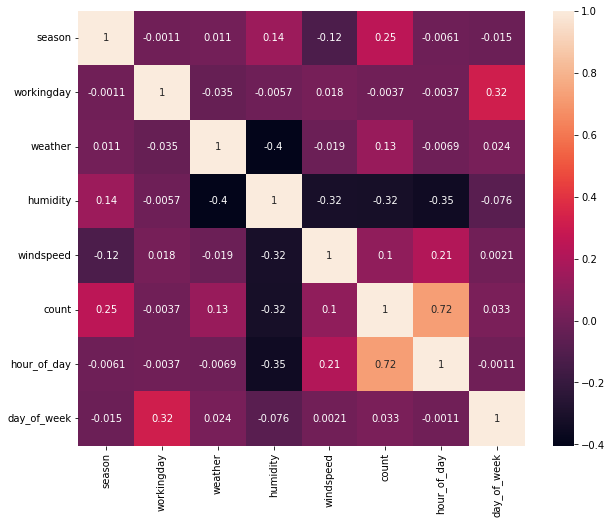

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True);

In [346]:
# remove humidity as it correlates to windspeed
df.drop(["humidity"], axis=1, inplace=True)

In [348]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

cols = df.columns.difference(['count'])

# TODO: k-folds cross validation?
X_train, X_test, y_train, y_test = train_test_split(df[cols], df["count"], test_size=0.30, shuffle=True, random_state=42)


rfr_grid_search = RandomForestRegressor()

rfr_grid_search.fit(X_train, y_train)

print(f"Train score: {mean_squared_log_error(y_true=y_train,y_pred=rfr_grid_search.predict(X_train))}")
print(f"Test score: {mean_squared_log_error(y_true=y_test,y_pred=rfr_grid_search.predict(X_test))}")

Train score: 0.07140151062350254
Test score: 0.27114739192709136
